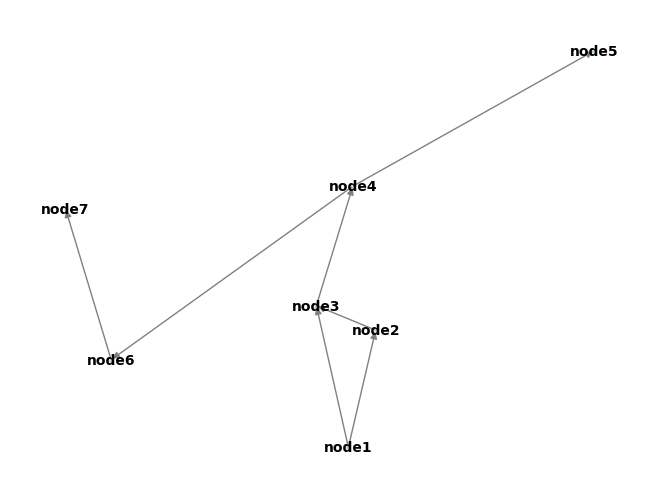

In [1]:
from ironweaver import Node, Edge, Vertex
import networkx as nx

g = Vertex()

node1 = g.add_node('node1', {'value': 1})
node2 = g.add_node('node2', {'value': 1})
node3 = g.add_node('node3', {'value': 1})
node4 = g.add_node('node4', {'value': 1})
node5 = g.add_node('node5', {'value': 1})

edge1 = g.add_edge('node1', 'node2', {'weight': 1.0})
edge2 = g.add_edge('node2', 'node3', {'weight': 1.0})
edge3 = g.add_edge('node1', 'node3', {'weight': 1.0})
edge4 = g.add_edge('node3', 'node4', {'weight': 1.0})
edge5 = g.add_edge('node4', 'node5', {'weight': 1.0})

node6 = g.add_node('node6', {'value': 1})
edge6 = g.add_edge('node4', 'node6', {'weight': 1.0})
node7 = g.add_node('node7', {'value': 1})
edge7 = g.add_edge('node6', 'node7', {'weight': 1.0})

nx_graph1 = g.to_networkx()
nx.draw(nx_graph1, with_labels=True, pos=nx.spring_layout(nx_graph1), node_size=5, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray')

In [2]:
nx_graph1.edges

OutEdgeView([('node6', 'node7'), ('node1', 'node2'), ('node1', 'node3'), ('node4', 'node5'), ('node4', 'node6'), ('node3', 'node4'), ('node2', 'node3')])

In [3]:
g["node1"].edges

[unknown: node1 --> node2, unknown: node1 --> node3]

In [4]:
# Test direct path (node1 to node5)
direct_path = g.shortest_path_bfs('node1', 'node5')
print(f"Direct path from node1 to node2: {direct_path}")

Direct path from node1 to node2: Vertex(node5, node3, node4, node1)


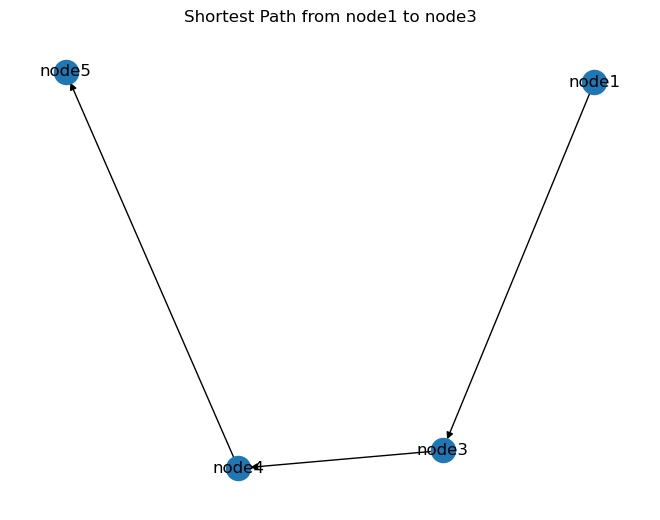

In [5]:
import networkx as nx

nx_graph2 = direct_path.to_networkx()
nx.draw(nx_graph2, with_labels=True)
import matplotlib.pyplot as plt
plt.title("Shortest Path from node1 to node3")
plt.show()

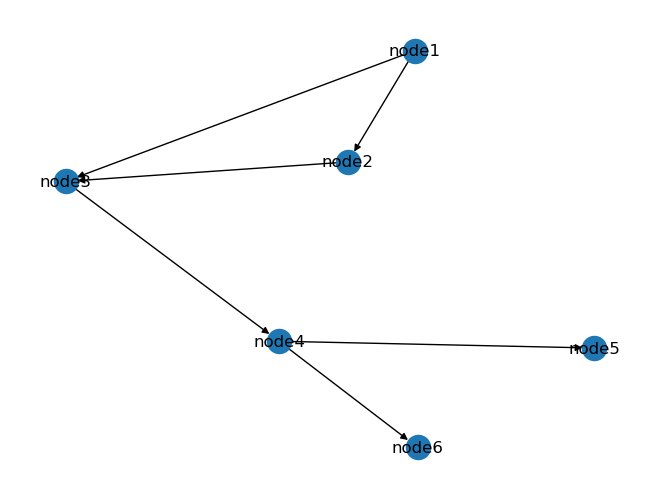

In [6]:

nx_graph3 = direct_path.expand(g, 1).to_networkx()

# plot
nx.draw(
    nx_graph3, 
    with_labels=True, 
    pos=nx.spring_layout(nx_graph3, iterations=5)
)

In [7]:
expanded = direct_path.expand(g, 1)

expanded.save_to_json("./example_graph.json")

reloaded_expanded = Vertex().load_from_json("./example_graph.json")

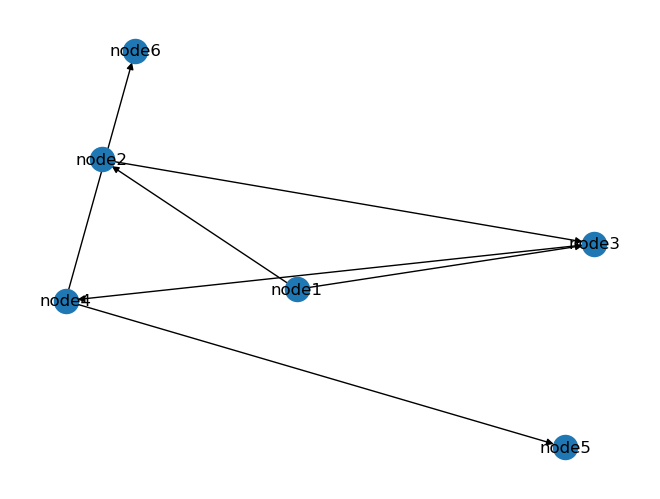

In [8]:
nx_graph4 = reloaded_expanded.to_networkx()
nx.draw(
    nx_graph4, 
    with_labels=True, 
    pos=nx.spring_layout(nx_graph3, iterations=5)
)

In [15]:
v = Vertex()


# create a callback that allows self and node to be passed
def __callback(vertex, node):
    # FIXED: Need to reassign the entire meta dict for changes to persist
    if "visited_nodes" not in vertex.meta:
        vertex.meta["visited_nodes"] = []
    vertex.meta["visited_nodes"].append(node.id)
    return True  # Continue traversal

def add_embeddings(vertex, node):
    if "embedding" not in vertex.meta:
        vertex.meta["embedding"] = []  # Default embedding
        vertex.meta["embedding_ids"] = []
    if "embedding" in node.attr:
        vertex.meta["embedding"].append(node.attr["embedding"])
        vertex.meta["embedding_ids"].append(node.id)
    return True  # Continue traversal

v.on_node_add_callbacks.append(__callback)
v.on_node_add_callbacks.append(add_embeddings)
print(v.on_node_add_callbacks)

v.add_node('node1', {'value': 1, "embedding": [1.0, 2.0, 3.0, 4]})
v.add_node('node2', {'value': 2, "embedding": [2.0, 1.0, 3.0, 4]})
v.add_node('node3', {'value': 3, "embedding": [3.0, 2.0, 1.0, 1]})
v.add_edge('node1', 'node2', {'weight': 1.0})
v.add_edge('node2', 'node3', {'weight': 2.0})

print(v.meta)

[<function __callback at 0x736ba20f5760>, <function add_embeddings at 0x736ba20f5940>]
{'visited_nodes': ['node1', 'node2', 'node3'], 'embedding': [[1.0, 2.0, 3.0, 4], [2.0, 1.0, 3.0, 4], [3.0, 2.0, 1.0, 1]], 'embedding_ids': ['node1', 'node2', 'node3']}


In [46]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances as cos_distance
from scipy.special import softmax
# create a numpy array of embeddings

embeddings = np.array(v.meta["embedding"])
needle = np.array([[2, 1.5, 3, 3]])
distance = cos_distance(embeddings, needle)
needle_index = distance.argmin()
needle_id = v.meta["embedding_ids"][needle_index]

print(np.round(distance.min(),4), v[needle_id])

0.0175 node2


In [17]:
embeddings

array([[1., 2., 3., 4.],
       [2., 1., 3., 4.],
       [3., 2., 1., 1.]])